### 05.1 正规方程法

#### 获取数据


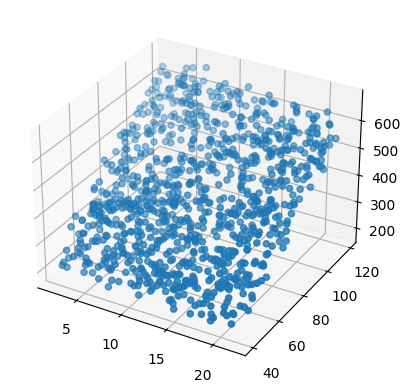

In [95]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
file_name = "ch05.npz"
def TargetFunction(x1,x2):
    w1,w2,b = 2,5,10
    return w1*(20-x1) + w2*x2 + b

def CreateSampleData(m):
    file = Path(file_name)
    if file.exists():
        data = np.load(file)
        X = data["data"]
        Y = data["label"]
    else:
        X = np.zeros((m,2))
        # radius [2,20]
        X[:,0:1] = (np.random.random(1000)*20+2).reshape(1000,1)
        # [40,120] square
        X[:,1:2] = np.random.randint(40,120,(m,1))
        Y = TargetFunction(X[:,0:1], X[:,1:2])
        Noise = np.random.randint(1,100,(m,1)) - 50
        Y = Y + Noise
        np.savez(file_name, data=X, label=Y)
    return X, Y
X,Y = CreateSampleData(1000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
plt.show()

我们假设函数为$$H(w,b) = b + x_1 w_1+x_2 w_2+ \dots +x_n w_n \tag{2}$$
$X$ 和 $W$ 的矩阵形状如下：

$$
X = 
\begin{pmatrix} 
1 & x_{1,1} & x_{1,2} & \dots & x_{1,n} \\\\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,n} \\\\
\vdots & \vdots & \vdots & \ddots & \vdots \\\\
1 & x_{m,1} & x_{m,2} & \dots & x_{m,n}
\end{pmatrix} \tag{5}
$$

$$
W= \begin{pmatrix}
w_0 \\\\
w_1 \\\\
\vdots \\\\
 w_n
\end{pmatrix}  \tag{6}
$$
#### 代码实现
公式如下$$W = (X^{\top} X)^{-1}{X^{\top} Y} \tag{10}$$
下面构建矩阵$X$

In [96]:
from HelperClass.DataReader_1_1 import *
reader = DataReader_1_1(file_name)
reader.ReadData()
X,Y = reader.GetWholeTrainSamples()
num_example = X.shape[0]
#返回全1的数组
one = np.ones((num_example,1))
#将两个矩阵按列合并
x = np.column_stack((one, (X[0:num_example,:])))
print(x)

[[  1.           6.20283041  65.        ]
 [  1.           6.0339494   46.        ]
 [  1.          21.02827462  63.        ]
 ...
 [  1.          18.90574387  89.        ]
 [  1.          12.90042985  80.        ]
 [  1.          17.27501264 115.        ]]


In [97]:
a = np.dot(x.T, x)
#转换为矩阵，因为 np.linalg.inv 只适用于矩阵而不是数组
b = np.asmatrix(a)
#矩阵求逆
c = np.linalg.inv(b)
d = np.dot(c, x.T)
e = np.dot(d, Y)
print(e)
b=e[0,0]
w1=e[1,0]
w2=e[2,0]
print("w1=", w1)
print("w2=", w2)
print("b=", b)
# inference
z = w1 * 15 + w2 * 93 + b
print("z=",z)

[[50.8957826 ]
 [-2.11960223]
 [ 4.98189539]]
w1= -2.1196022303932414
w2= 4.98189539382572
b= 50.89578259974307
z= 482.4180207696364


最后得出函数为：$$H(w,b) = 50.89 -2.11 x_1 +4.98 x_2 $$
画出图像：

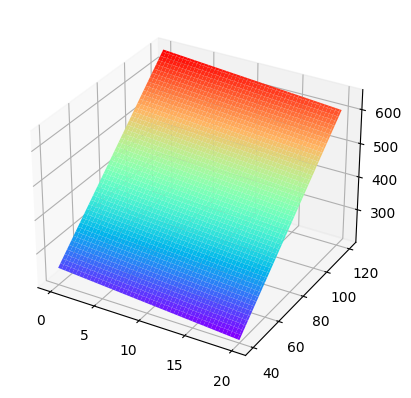

In [98]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
u = np.linspace(0, 20, 100)
v = np.linspace(40, 120, 100)
XM, YM = np.meshgrid(u, v)
R = np.zeros((len(u), len(v)))
for i in range(len(u)):
        for j in range(len(v)):
            R[i, j] = b + XM[i, j]*w1 + YM[i, j]*w2
ax.plot_surface(XM, YM, R, cmap='rainbow')